In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from scipy import optimize as op

In [4]:
import torch
from torch.optim import Adam
from torch import optim
from scipy.optimize import curve_fit

In [117]:
def func(x,a,b,c,d):
    y=d/(1+np.exp(a+b*x))+c
    return y

In [4]:
xdata1 = np.linspace(0, 1, 30)
xdata1=torch.tensor(xdata1)
y1 = func(xdata1, -4, 8, 0.1,0.8)
y_noise1 = 0.2 * torch.rand(30)
ydata1 = y1 + y_noise1
plt.plot(xdata1, ydata1, '-', color = "#0065bd",label='data')
# Fit for the parameters a, b, c of the function func:

xdata2 = np.linspace(1, 8, 50)
xdata2=torch.tensor(xdata2)
y2 = func(xdata2, 10, -2, 0,1)
y_noise2 = 0.15 * torch.rand(50)
ydata2 = y2 + y_noise2
ydata2[0]=ydata1[-1]
plt.plot(xdata2, ydata2, '-',color = "#0065bd")


popt1, pcov1 = curve_fit(func, xdata1, ydata1)
print(popt1)
popt2, pcov2 = curve_fit(func, xdata2, ydata2)
print(popt2)
y1=func(xdata1, *popt1)
y2=func(xdata2, *popt2)
#y2[0]=y1[-1]
plt.plot(xdata1, y1, 'r-',
         label='fit1: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt1))
plt.plot(xdata2, y2, '-',color = "#e37222",
         label='fit2: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt2))

plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

: 

([<matplotlib.axis.XTick at 0x26c9c36f788>,
 <a list of 8 Text major ticklabel objects>)

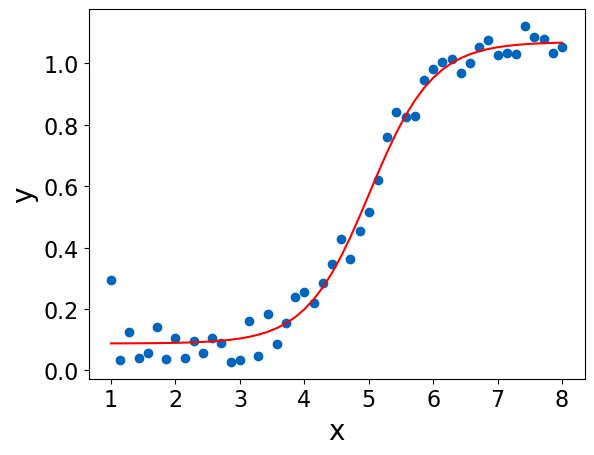

In [9]:

plt.scatter(xdata2, ydata2,color = "#0065bd")
plt.plot(xdata2, y2, '-',color='r',
         label='fit2: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f' % tuple(popt2))
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.tick_params(labelsize=16)
x_ticks = np.linspace(1, 8, 8)
plt.xticks(x_ticks)

In [104]:
x = 2*np.ones(50)
x

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### Conceptual resilience patterns

In [136]:
xdata1 = np.linspace(0, 2, 40)
y1 = func(xdata1, -8, 8, 0.2,0.8)
xdata2 = np.linspace(2, 4, 40)
y2 = func(xdata2, 24, -8, 0.2,0.8)
xdata3 = np.linspace(2, 4, 40)
y3 = func(xdata2, 24, -8, 0.2,0.95)
xdata4 = np.linspace(2, 4, 40)
y4 = func(xdata4, 24, -8, 0.2,0.65)

xdata5 = 2*np.ones(40)
y5 = np.linspace(0, 1, 40)
xdata6 = np.linspace(0, 4, 40)
y6 = np.ones(40)
xdata7 = np.linspace(0, 2, 40)
y7 = 0.2*np.ones(40)
xdata8 = 0.4*np.ones(40)
y8 = np.linspace(0, 1, 40)
xdata9 = 3.6*np.ones(40)
y9 = np.linspace(0, 1, 40)

xdata10 = 2*np.ones(40)
y10 = np.linspace(0.6, 1.0, 40)

xdata11 = np.linspace(2, 3.8, 40)
y11 = xdata11*0.8/1.8 + 0.2 - 0.8*2/1.8

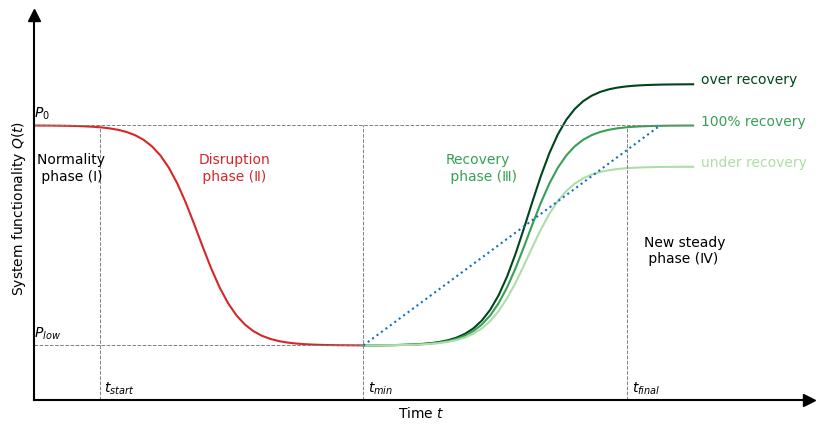

In [138]:

fig, ax = plt.subplots(figsize=(10,5))
# ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines[['right', 'top']].set_visible(False)
ax.plot((4.7), (0), ls="", marker=">", ms=8, color="k", clip_on=False)
ax.plot((0), (1.4), ls="", marker="^", ms=8, color="k", clip_on=False)
ax.set_xticks([])
ax.set_yticks([])

cmap = plt.cm.Greens
colors = [cmap((3-i)/3) for i in range(3)]

ax.plot(xdata1, y1,color = "tab:red")
ax.plot(xdata3, y3, color=colors[0])
ax.plot(xdata2, y2, color=colors[1])
ax.plot(xdata4, y4, color=colors[2])
ax.plot(xdata11, y11, color='#1171be', linestyle=':')
ax.plot(xdata5, y5, c='grey', linestyle='--', linewidth=0.7)
ax.plot(xdata6, y6, c='grey', linestyle='--', linewidth=0.7)
ax.plot(xdata7, y7, c='grey', linestyle='--', linewidth=0.7)
ax.plot(xdata8, y8, c='grey', linestyle='--', linewidth=0.7)
ax.plot(xdata9, y9, c='grey', linestyle='--', linewidth=0.7)

ax.annotate("Normality \n phase (Ⅰ)", xy = (0.02,0.8),xytext= (0.02,0.8),color = "k")
ax.annotate("Disruption\n phase (Ⅱ)", xy = (1,0.8),xytext= (1,0.8),color = "tab:red")
ax.annotate("Recovery\n phase (Ⅲ)", xy = (2.5, 0.8),xytext= (2.5, 0.8),color = colors[1])
ax.annotate("New steady \n phase (Ⅳ)", xy = (3.7,0.5),xytext= (3.7,0.5),color = "k")
# ax.annotate("Resistance",  xy = (2,0.6),xytext= (2.07, 0.6),color = "tab:blue")
# ax.annotate("Event  Duration(T)",  xy = (1.75,0.13),xytext= (1.75, 0.13),color = "k")
ax.annotate("over recovery", xy = (4.05,1.1),xytext= (4.05, 1.15),color = colors[0])
ax.annotate("100% recovery", xy = (4.05,1.0),xytext= (4.05, 1.0),color = colors[1])
ax.annotate("under recovery", xy = (4.05,0.9),xytext= (4.05, 0.85),color = colors[2])

ax.annotate("$P_0$", xy = (0,1.03),xytext= (0,1.03),color = "k")
ax.annotate("$P_{low}$", xy = (0,0.23),xytext= (0,0.23),color = "k")
ax.annotate("$t_{start}$", xy = (0.43,0.03),xytext= (0.43,0.03),color = "k")
ax.annotate("$t_{min}$", xy = (2.03,0.03),xytext= (2.03,0.03),color = "k")
ax.annotate("$t_{final}$", xy = (3.63,0.03),xytext= (3.63,0.03),color = "k")
ax.set_xlabel('Time $t$')
ax.set_ylabel('System functionality $Q(t)$')
ax.set_xlim((0,4.7))
ax.set_ylim((0,1.4))

fig.savefig('figures/conceptual_resilience.pdf', bbox_inches='tight')

### Distance metrics comparison

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import matplotlib.ticker as tck

In [22]:

# --- Helper: compute DTW alignment ---
def dtw_distance(series_a, series_b):
    n, m = len(series_a), len(series_b)
    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = (series_a[i - 1] - series_b[j - 1]) ** 2
            dtw[i, j] = cost + min(dtw[i - 1, j], dtw[i, j - 1], dtw[i - 1, j - 1])

    # backtrack to find the optimal path
    i, j = n, m
    path = []
    while i > 0 and j > 0:
        path.append((i - 1, j - 1))
        options = [dtw[i - 1, j - 1], dtw[i - 1, j], dtw[i, j - 1]]
        move = np.argmin(options)
        if move == 0:
            i, j = i - 1, j - 1
        elif move == 1:
            i -= 1
        else:
            j -= 1
    path.reverse()
    return sqrt(dtw[n, m]), path

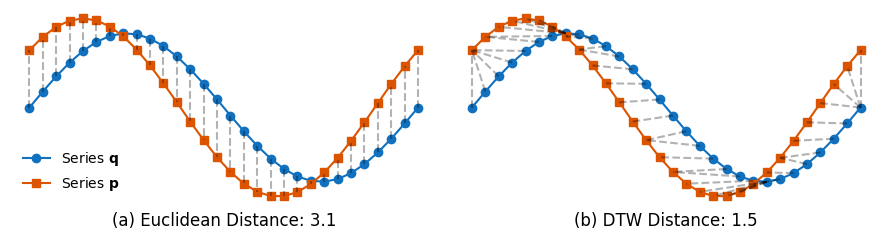

In [112]:

# --- Generate sample data ---
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 30)
y1 = np.sin(x)                       # base signal
y2 = np.sin(x + 0.7) * 1.2           # shifted and scaled version

# --- Compute Euclidean distance ---
euclidean_dist = np.sqrt(np.sum((y1 - y2) ** 2))

# --- Compute DTW distance and alignment path ---
dtw_dist, dtw_path = dtw_distance(y1, y2)

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5))
axes[0].spines[['right', 'top', 'bottom', 'left']].set_visible(False)
axes[1].spines[['right', 'top', 'bottom', 'left']].set_visible(False)

# ====== (A) Euclidean distance ======
axes[0].plot(y1, color='#1171be', label=r'Series $\mathbf{q}$', marker='o')
axes[0].plot(y2, color='#dd5400', label=r'Series $\mathbf{p}$', marker='s')
for i in range(len(y1)):
    axes[0].plot([i, i], [y1[i], y2[i]], 'k--', alpha=0.3)
axes[0].set_title(f'(a) Euclidean Distance: {euclidean_dist:.1f}', y=-0.15)
axes[0].legend(frameon=False)
axes[0].set_yticks([])
axes[0].set_yticklabels([])
axes[0].set_xticks([])
axes[0].set_xticklabels([])

# ====== (B) DTW distance ======
axes[1].plot(y1, color='#1171be', label=r'Series $\mathbf{q}$', marker='o')
axes[1].plot(y2, color='#dd5400', label=r'Series $\mathbf{p}$', marker='s')
for (i, j) in dtw_path:
    axes[1].plot([i, j], [y1[i], y2[j]], 'k--', alpha=0.3)
axes[1].set_title(f'(b) DTW Distance: {dtw_dist:.1f}', y=-0.15)
axes[1].set_yticks([])
axes[1].set_yticklabels([])
axes[1].set_xticks([])
axes[1].set_xticklabels([])

plt.tight_layout()
plt.show()
fig.savefig('figures/dtw_vs_euclidean.pdf', bbox_inches='tight')

DTW distance = 1.0821


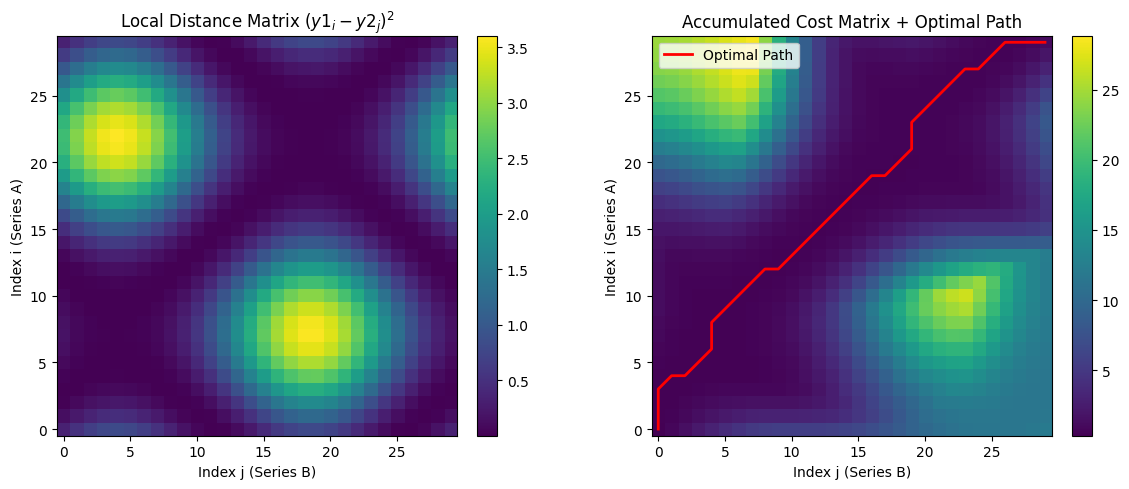

In [ ]:
n, m = len(y1), len(y2)

# --- Step 2: Compute local distance matrix (Euclidean cost) ---
local_dist = np.zeros((n, m))
for i in range(n):
    for j in range(m):
        local_dist[i, j] = (y1[i] - y2[j]) ** 2

# --- Step 3: Compute accumulated cost matrix (DTW dynamic programming) ---
dtw = np.full((n + 1, m + 1), np.inf)
dtw[0, 0] = 0

for i in range(1, n + 1):
    for j in range(1, m + 1):
        cost = local_dist[i - 1, j - 1]
        dtw[i, j] = cost + min(
            dtw[i - 1, j],     # insertion
            dtw[i, j - 1],     # deletion
            dtw[i - 1, j - 1]  # mat_sh
        )

# --- Step 4: Backtrack to find optimal warping path ---
i, j = n, m
path = []
while i > 0 and j > 0:
    path.append((i - 1, j - 1))
    options = [dtw[i - 1, j - 1], dtw[i - 1, j], dtw[i, j - 1]]
    move = np.argmin(options)
    if move == 0:
        i, j = i - 1, j - 1
    elif move == 1:
        i -= 1
    else:
        j -= 1
path.reverse()

dtw_distance = np.sqrt(dtw[n, m])
print(f"DTW distance = {dtw_distance:.4f}")

# --- Step 5: Plot the local distance matrix and optimal path ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (A) Local distance matrix
im0 = axes[0].imshow(local_dist, origin='lower', cmap='viridis', interpolation='nearest')
axes[0].set_title("Local Distance Matrix $(y1_i - y2_j)^2$")
axes[0].set_xlabel("Index j (Series B)")
axes[0].set_ylabel("Index i (Series A)")
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# (B) Accumulated cost matrix + optimal path
im1 = axes[1].imshow(dtw[1:, 1:], origin='lower', cmap='viridis', interpolation='nearest')
axes[1].set_title("Accumulated Cost Matrix + Optimal Path")
axes[1].set_xlabel("Index j (Series B)")
axes[1].set_ylabel("Index i (Series A)")
# Overlay the optimal path
pi, pj = zip(*path)
axes[1].plot(pj, pi, 'r-', linewidth=2, label='Optimal Path')
axes[1].legend()
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


C:\Users\ql.lu\AppData\Local\Temp\ipykernel_11500\4089570970.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


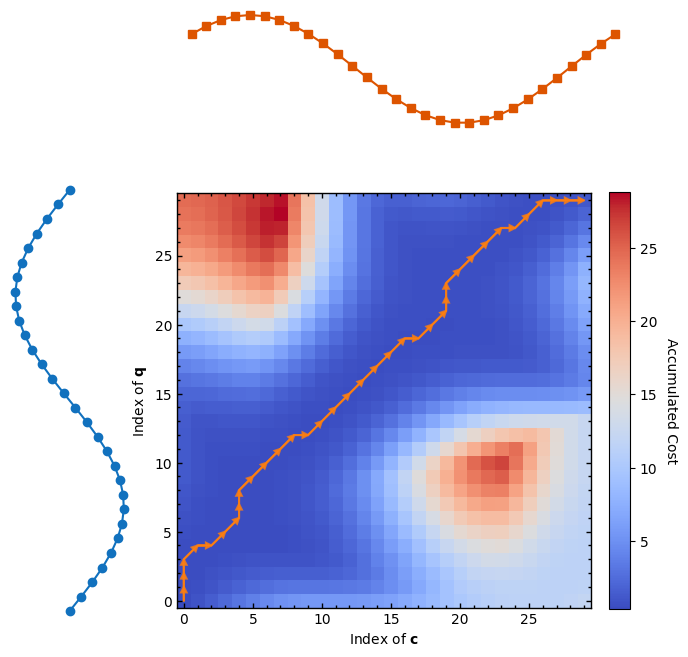

In [ ]:
n, m = len(y1), len(y2)

# --- Step 2: Compute accumulated cost matrix (DTW) ---
dtw = np.full((n + 1, m + 1), np.inf)
dtw[0, 0] = 0

for i in range(1, n + 1):
    for j in range(1, m + 1):
        cost = (y1[i - 1] - y2[j - 1]) ** 2
        dtw[i, j] = cost + min(dtw[i - 1, j], dtw[i, j - 1], dtw[i - 1, j - 1])

# --- Step 3: Backtrack to find optimal path ---
i, j = n, m
path = []
while i > 0 and j > 0:
    path.append((i - 1, j - 1))
    options = [dtw[i - 1, j - 1], dtw[i - 1, j], dtw[i, j - 1]]
    move = np.argmin(options)
    if move == 0:
        i, j = i - 1, j - 1
    elif move == 1:
        i -= 1
    else:
        j -= 1
path.reverse()

# --- Step 4: Create figure layout ---
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)

# Left plot: time series y1
ax_left = fig.add_subplot(grid[1:, 0])
ax_left.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

ax_left.plot(y1, range(1, n + 1), color='#1171be', label=r'Series $\mathbf{q}$', marker='o')
# ax_left.legend(loc='upper right', fontsize=8)
ax_left.set_ylim(0, n + 1)
ax_left.set_xticks([])
ax_left.set_yticks([])

# Top plot: time series y2
ax_top = fig.add_subplot(grid[0, 1:])
ax_top.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

ax_top.plot(range(1, m + 1), y2, color='#dd5400', label=r'Series $\mathbf{p}$', marker='s')
# ax_top.legend(loc='lower left', fontsize=8)
ax_top.set_xlim(0, m + 1)
ax_top.set_xticks([])
ax_top.set_yticks([])


# Main DTW cost matrix
ax_main = fig.add_subplot(grid[1:, 1:])
ax_main.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax_main.spines[['bottom','top','left','right']].set_linewidth(1)
ax_main.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax_main.xaxis.set_minor_locator(tck.AutoMinorLocator())

cost_matrix = dtw[1:, 1:]
im = ax_main.imshow(cost_matrix, origin='lower', cmap='coolwarm', interpolation='none')
cbar = plt.colorbar(im, ax=ax_main, fraction=0.046, pad=0.04)
cbar.set_label("Accumulated Cost", rotation=270, labelpad=15)
# Add numeric values in cells
# for i in range(n):
#     for j in range(m):
#         ax_main.text(j, i, f"{cost_matrix[i, j]:.1f}", ha='center', va='center', fontsize=4)

# Plot the optimal warping path
pi, pj = zip(*path)
ax_main.plot(pj, pi, color='tab:orange', linewidth=1)

# Plot the path with arrows
for k in range(len(path) - 1):
    i1, j1 = path[k]
    i2, j2 = path[k + 1]
    ax_main.arrow(
        j1, i1,                   # start at (x, y)
        j2 - j1, i2 - i1,         # vector direction
        color='tab:orange',
        length_includes_head=True,
        head_width=0.4,
        head_length=0.4,
        linewidth=1.5,
        alpha=0.8
    )

ax_main.set_xlabel(r'Index of $\mathbf{p}$')
ax_main.set_ylabel(r'Index of $\mathbf{q}$')
# ax_main.set_title('DTW Accumulated Cost Matrix with Optimal Path')

plt.tight_layout()
plt.show()


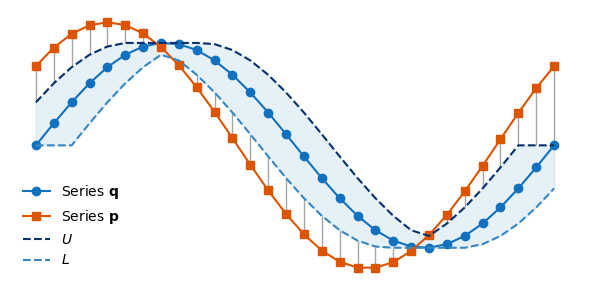

In [113]:
# Window radius for envelope
r = 2

# ------------------------------------------------------------------
# Helper function to compute envelope
# ------------------------------------------------------------------
def envelope(series, r):
    lower, upper = [], []
    for i in range(len(series)):
        start = max(0, i - r)
        end = min(len(series), i + r + 1)
        window = series[start:end]
        lower.append(np.min(window))
        upper.append(np.max(window))
    return np.array(lower), np.array(upper)

# Compute upper and lower envelopes around y1 (series C)
lower_env, upper_env = envelope(y1, r)

# ------------------------------------------------------------------
# Compute LB Keogh contribution (for shading)
# ------------------------------------------------------------------
outside_upper = y2 > upper_env
outside_lower = y2 < lower_env

# ------------------------------------------------------------------
# Plot
# ------------------------------------------------------------------
cmap = plt.cm.Blues
colors = [cmap((3-i)/3) for i in range(3)]

fig, ax = plt.subplots(figsize=(6, 3))
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

ax.plot(x, y1, color='#1171be', linestyle='-', label=r'Series $\mathbf{q}$', marker='o')
ax.plot(x, y2, color='#dd5400', linestyle='-', label=r'Series $\mathbf{p}$', marker='s')
ax.plot(x, upper_env, color=colors[0], linestyle='--', label='$U$')
ax.plot(x, lower_env, color=colors[1], linestyle='--', label='$L$')

# Shade regions where y2 is outside the envelope
for i in range(len(x)):
    if outside_upper[i]:
        ax.fill_between([x[i]], upper_env[i], y2[i], color='gray', alpha=0.7)
    elif outside_lower[i]:
        ax.fill_between([x[i]], y2[i], lower_env[i], color='gray', alpha=0.7)
ax.fill_between(x, lower_env, upper_env, color=colors[-1], alpha=0.3)
# Labels and title
ax.legend(frameon=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

fig.savefig('figures/lb_keogh_envelope.pdf', bbox_inches='tight')


### Model parameter sensitivity

In [4]:
def resilience_curve(t, params):
    (A_d, k_d, v_d,
     A_r, k_r, v_r, m,
     t_d, t_r, t_s, k_s) = params
    
    # Disruption phase
    D = A_d / (1 + np.exp(-k_d * (t - t_d)))**v_d
    
    # Recovery phase
    R = A_r / (1 + np.exp(-k_r * (t - t_r)))**v_r + m * (t - t_r)
    
    # Smooth transition
    S = 1 / (1 + np.exp(-k_s * (t - t_s)))
    
    return 1 + (1 - S) * D + S * R

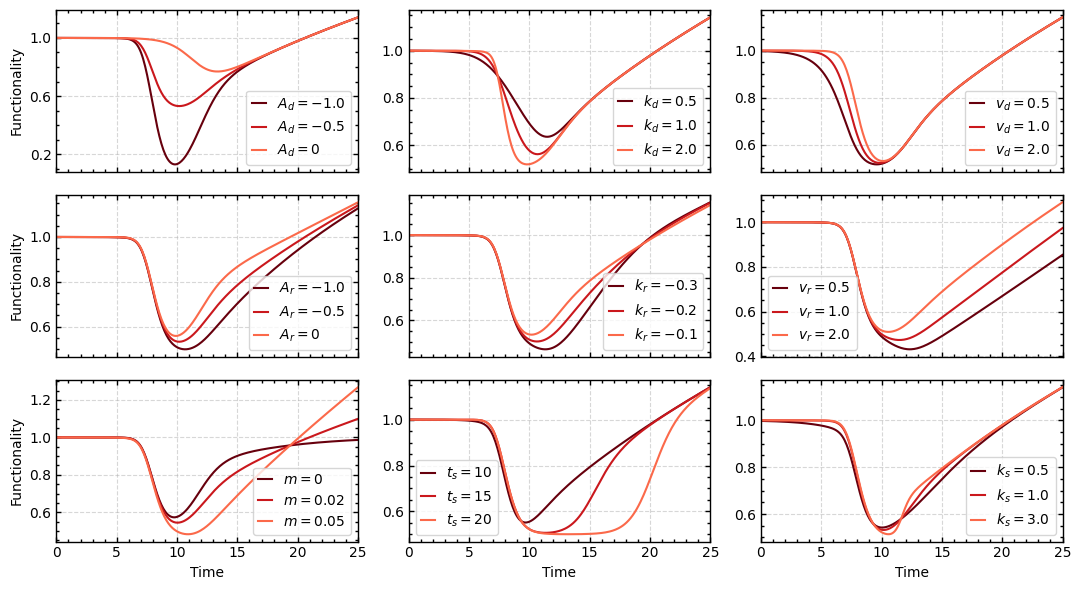

In [5]:
# === Simulation setup ===
t = np.linspace(0, 25, 300)   # time vector

# Baseline parameters (typical values)
base_params = [-0.5,  1.5,  2.31544508, # A_d, k_d, v_d
               -0.5, -0.1,  3.55798098, # A_r, k_r, v_r
               0.02752209,  # m
               7.38466884, 19.37162467, 11.61923382, # t_d, t_r, t_s
               1]  # k_s
cmap = plt.cm.Reds
colors = [cmap((4-i)/4) for i in range(4)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(11, 6))
for i in range(3):
    for j in range(3):
        axes[i,j].tick_params(direction='in', top=True, right=True, which='both', width=1)
        axes[i,j].spines[['bottom','top','left','right']].set_linewidth(1)
        axes[i,j].yaxis.set_minor_locator(tck.AutoMinorLocator())
        axes[i,j].xaxis.set_minor_locator(tck.AutoMinorLocator())
        axes[i,j].set_xlim(0, 25)
        # axes[i,j].set_ylim(-1, 0.3)
        if i<2:
            axes[i,j].set_xticklabels([])
        # if j>0:
            # axes[i,j].set_yticklabels([])
# === 1. Explore disruption parameters (A_d, k_d, v_d) ===
for c, A_d in enumerate([-1.0, -0.5, 0]):
    params = base_params.copy()
    params[0] = A_d
    axes[0,0].plot(t, resilience_curve(t, params), label=f"$A_d={A_d}$", color=colors[c])
axes[0,0].set_ylabel("Functionality"); axes[0,0].legend(handlelength=1); axes[0,0].grid(True, linestyle='--', alpha=0.5) 
axes[0,0].set_yticks([0.2,0.6,1])

for c, k_d in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[1] = k_d
    axes[0,1].plot(t, resilience_curve(t, params), label=f"$k_d={k_d}$", color=colors[c])
axes[0,1].legend(handlelength=1); axes[0,1].grid(True, linestyle='--', alpha=0.5)

for c, v_d in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[2] = v_d
    axes[0,2].plot(t, resilience_curve(t, params), label=f"$v_d={v_d}$", color=colors[c])
axes[0,2].legend(handlelength=1); axes[0,2].grid(True, linestyle='--', alpha=0.5)


# === 2. Explore recovery parameters (A_r, k_r, v_r, m) ===
for c, A_r in enumerate([-1.0, -0.5, 0]):
    params = base_params.copy()
    params[3] = A_r
    axes[1,0].plot(t, resilience_curve(t, params), label=f"$A_r={A_r}$", color=colors[c])
axes[1,0].set_ylabel("Functionality"); axes[1,0].legend(handlelength=1); axes[1,0].grid(True, linestyle='--', alpha=0.5)

for c, k_r in enumerate([-0.3,-0.2,-0.1]):
    params = base_params.copy()
    params[4] = k_r
    axes[1,1].plot(t, resilience_curve(t, params), label=f"$k_r={k_r}$", color=colors[c])
axes[1,1].legend(handlelength=1); axes[1,1].grid(True, linestyle='--', alpha=0.5)

for c, v_r in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[5] = v_r
    axes[1,2].plot(t, resilience_curve(t, params), label=f"$v_r={v_r}$", color=colors[c])
axes[1,2].legend(handlelength=1); axes[1,2].grid(True, linestyle='--', alpha=0.5)

# === 3. Explore transition parameters (t_d, t_r, t_s, k_s) ===
for c, m in enumerate([0, 0.02, 0.05]):
    params = base_params.copy()
    params[6] = m
    axes[2,0].plot(t, resilience_curve(t, params), label=f"$m={m}$", color=colors[c])
axes[2,0].set_xlabel("Time"); axes[2,0].set_ylabel("Functionality"); axes[2,0].legend(handlelength=1); axes[2,0].grid(True, linestyle='--', alpha=0.5)

for c, t_s in enumerate([10, 15, 20]):
    params = base_params.copy()
    params[9] = t_s
    axes[2,1].plot(t, resilience_curve(t, params), label=f"$t_s={t_s}$", color=colors[c])
axes[2,1].set_xlabel("Time"); axes[2,1].legend(handlelength=1); axes[2,1].grid(True, linestyle='--', alpha=0.5)

for c, k_s in enumerate([0.5, 1.0, 3.0]):
    params = base_params.copy()
    params[10] = k_s
    axes[2,2].plot(t, resilience_curve(t, params), label=f"$k_s={k_s}$", color=colors[c])
axes[2,2].set_xlabel("Time"); axes[2,2].legend(handlelength=1); axes[2,2].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

fig.savefig('figures/resilience_parameter_sensitivity.pdf', bbox_inches='tight')


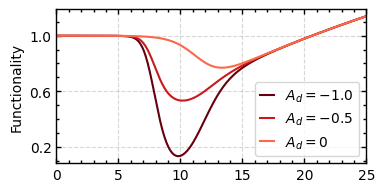

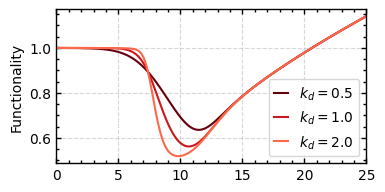

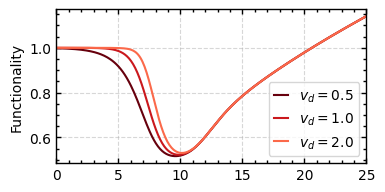

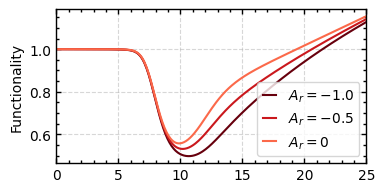

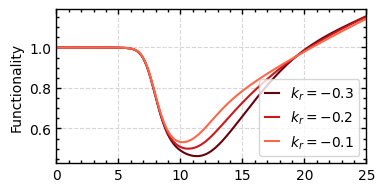

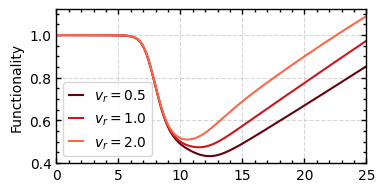

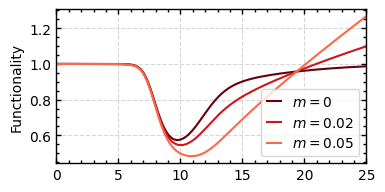

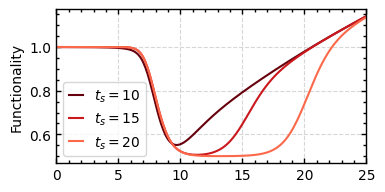

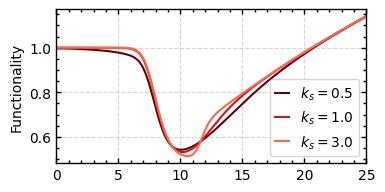

In [6]:
# === Simulation setup ===
t = np.linspace(0, 25, 300)   # time vector

# Baseline parameters (typical values)
base_params = [-0.5,  1.5,  2.31544508, # A_d, k_d, v_d
               -0.5, -0.1,  3.55798098, # A_r, k_r, v_r
               0.02752209,  # m
               7.38466884, 19.37162467, 11.61923382, # t_d, t_r, t_s
               1]  # k_s
cmap = plt.cm.Reds
colors = [cmap((4-i)/4) for i in range(4)]
# === 1. Explore disruption parameters (A_d, k_d, v_d) ===
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, A_d in enumerate([-1.0, -0.5, 0]):
    params = base_params.copy()
    params[0] = A_d
    ax.plot(t, resilience_curve(t, params), label=f"$A_d={A_d}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
ax.set_yticks([0.2,0.6,1])
fig.savefig('figures/para_sensitivity_Ad.pdf', bbox_inches='tight')

# -------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, k_d in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[1] = k_d
    ax.plot(t, resilience_curve(t, params), label=f"$k_d={k_d}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_kd.pdf', bbox_inches='tight')

# -------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, v_d in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[2] = v_d
    ax.plot(t, resilience_curve(t, params), label=f"$v_d={v_d}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_vd.pdf', bbox_inches='tight')

# === 2. Explore recovery parameters (A_r, k_r, v_r, m) ===
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, A_r in enumerate([-1.0, -0.5, 0]):
    params = base_params.copy()
    params[3] = A_r
    ax.plot(t, resilience_curve(t, params), label=f"$A_r={A_r}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_Ar.pdf', bbox_inches='tight')

#-------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, k_r in enumerate([-0.3,-0.2,-0.1]):
    params = base_params.copy()
    params[4] = k_r
    ax.plot(t, resilience_curve(t, params), label=f"$k_r={k_r}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_kr.pdf', bbox_inches='tight')

#-------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, v_r in enumerate([0.5, 1.0, 2.0]):
    params = base_params.copy()
    params[5] = v_r
    ax.plot(t, resilience_curve(t, params), label=f"$v_r={v_r}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_vr.pdf', bbox_inches='tight')

# === 3. Explore transition parameters (t_d, t_r, t_s, k_s) ===
#-------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, m in enumerate([0, 0.02, 0.05]):
    params = base_params.copy()
    params[6] = m
    ax.plot(t, resilience_curve(t, params), label=f"$m={m}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_m.pdf', bbox_inches='tight')

#-------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, t_s in enumerate([10, 15, 20]):
    params = base_params.copy()
    params[9] = t_s
    ax.plot(t, resilience_curve(t, params), label=f"$t_s={t_s}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_ts.pdf', bbox_inches='tight')

#-------
fig, ax = plt.subplots(figsize=(4, 2))
ax.tick_params(direction='in', top=True, right=True, which='both', width=1)
ax.spines[['bottom','top','left','right']].set_linewidth(1)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.set_xlim(0, 25)
for c, k_s in enumerate([0.5, 1.0, 3.0]):
    params = base_params.copy()
    params[10] = k_s
    ax.plot(t, resilience_curve(t, params), label=f"$k_s={k_s}$", color=colors[c])
ax.set_ylabel("Functionality"); ax.legend(handlelength=1); ax.grid(True, linestyle='--', alpha=0.5) 
fig.savefig('figures/para_sensitivity_ks.pdf', bbox_inches='tight')